#### Load Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Load and understand data

In [3]:
# Loading Dataset
df_train = pd.read_csv("Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")
df_test = pd.read_csv("Uniqlo(FastRetailing) 2017 Test - stocks2017.csv")

# check first five rows of the data
df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [4]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# index the data with date
df_train.index = df_train['Date']
df_test.index = df_test['Date']

# Check first five rows of the data
df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,,
2016-12-30,2016-12-30,42120,42330,41700,41830,610000,25628028000
2016-12-29,2016-12-29,43000,43220,42540,42660,448400,19188227000
2016-12-28,2016-12-28,43940,43970,43270,43270,339900,14780670000
2016-12-27,2016-12-27,43140,43700,43140,43620,400100,17427993000
2016-12-26,2016-12-26,43310,43660,43090,43340,358200,15547803000


### Exploratory Data Analysis

In [5]:
# shape of the dataset
print("Shape of the train dataset is:", df_train.shape)
print("Shape of the test dataset is:", df_test.shape)

Shape of the train dataset is: (1226, 7)
Shape of the test dataset is: (7, 7)


In [6]:
# checking info of dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1226 entries, 2016-12-30 to 2012-01-04
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1226 non-null   datetime64[ns]
 1   Open           1226 non-null   int64         
 2   High           1226 non-null   int64         
 3   Low            1226 non-null   int64         
 4   Close          1226 non-null   int64         
 5   Volume         1226 non-null   int64         
 6   Stock Trading  1226 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 76.6 KB


In [7]:
# Checking null values
df_train.isnull().sum()  

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

In [8]:
# Checking statistical properties of data
df_train.describe()

,Open,High,Low,Close,Volume,Stock Trading
count,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1.226000e+03
mean,33754.416803,34178.784666,33347.903752,33760.583197,7.275556e+05,2.440933e+10
std,10813.440409,10936.326802,10695.664102,10815.661389,4.137178e+05,1.526300e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27788.750000,28091.250000,27401.250000,27675.000000,4.873000e+05,1.454097e+10
50%,34445.000000,34835.000000,33925.000000,34412.500000,6.260000e+05,2.153772e+10
75%,41412.500000,41900.000000,40810.000000,41365.000000,8.267000e+05,3.015922e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


### Data visualization

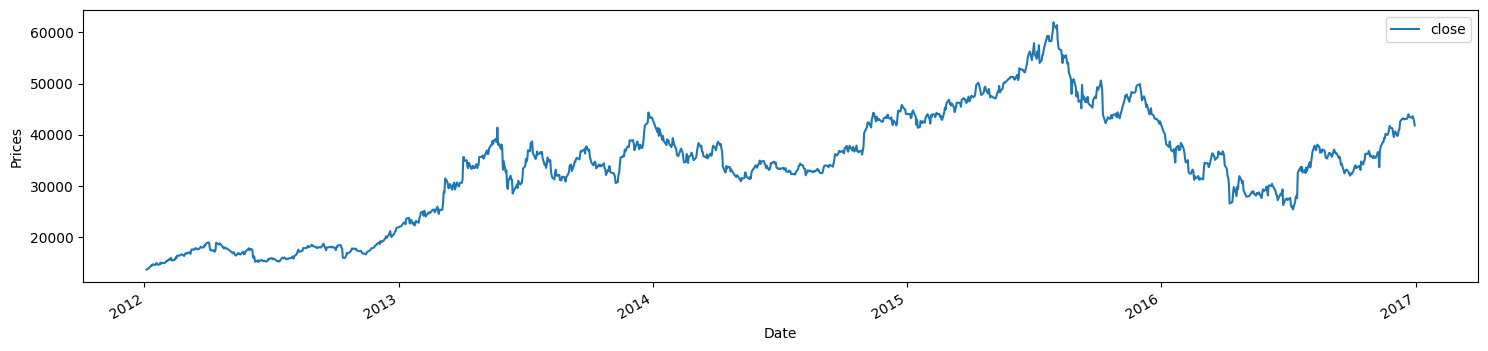

In [9]:
# Plotting distribution for Close
plt.figure(figsize=(18,4))
df_train['Close'].plot(label='close')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()


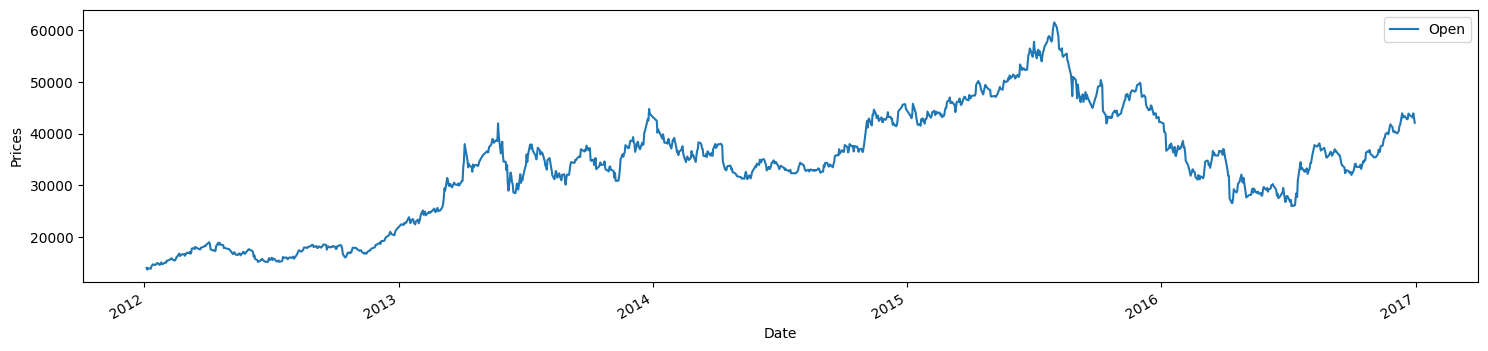

In [10]:
# Plotting distribution for Open
plt.figure(figsize=(18,4))
df_train['Open'].plot(label='Open')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

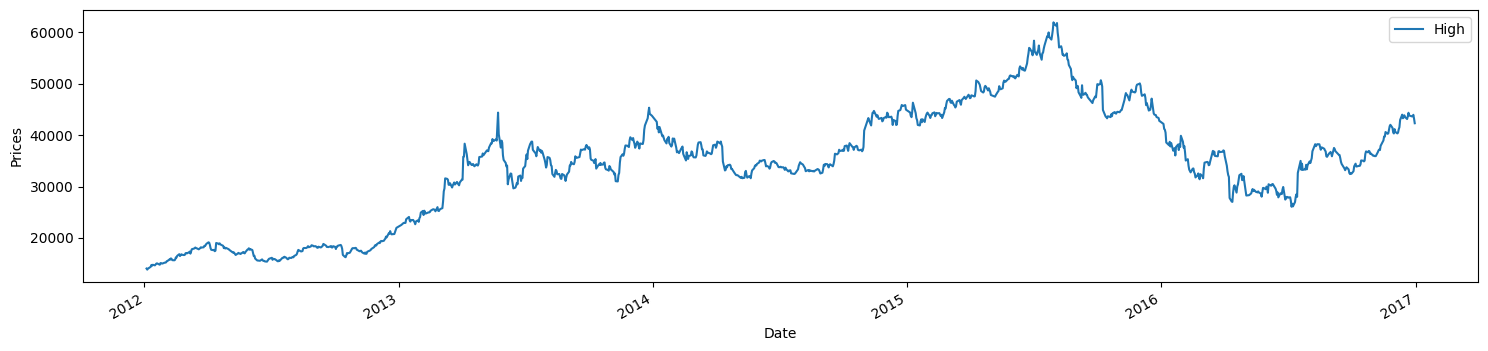

In [11]:
# Plotting distribution for High
plt.figure(figsize=(18,4))
df_train['High'].plot(label='High')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

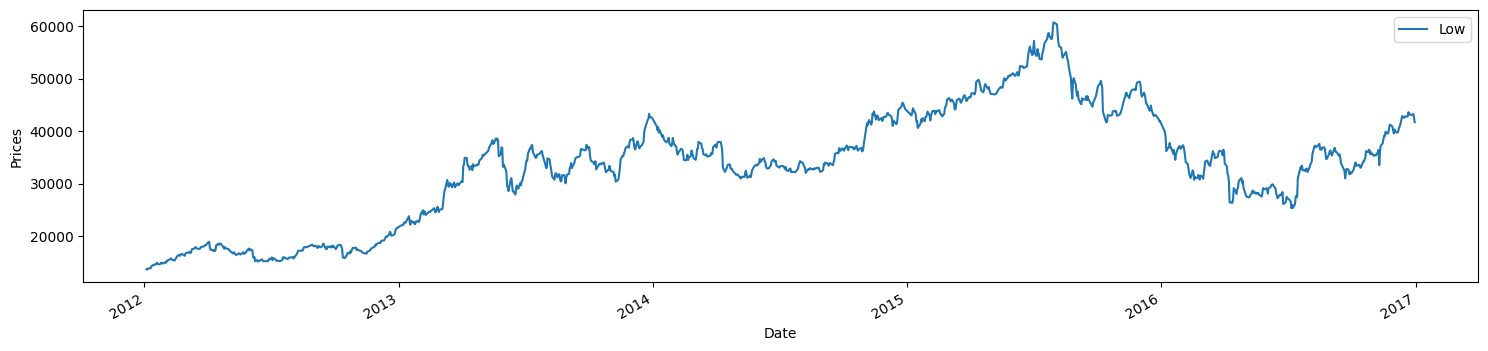

In [12]:
# Plotting distribution for Low
plt.figure(figsize=(18,4))
df_train['Low'].plot(label='Low')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

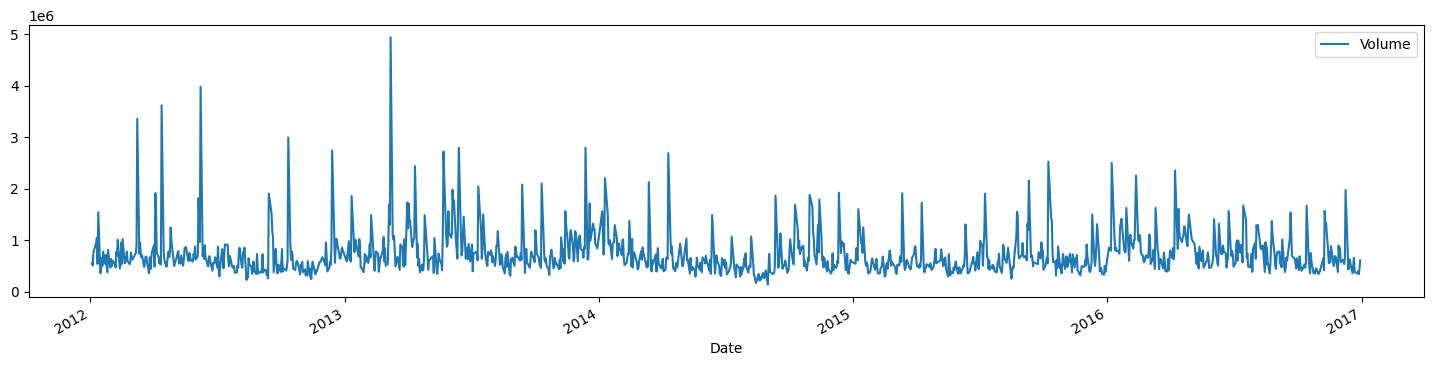

In [13]:
df_train['Volume'].plot(legend=True, figsize=(18,4))

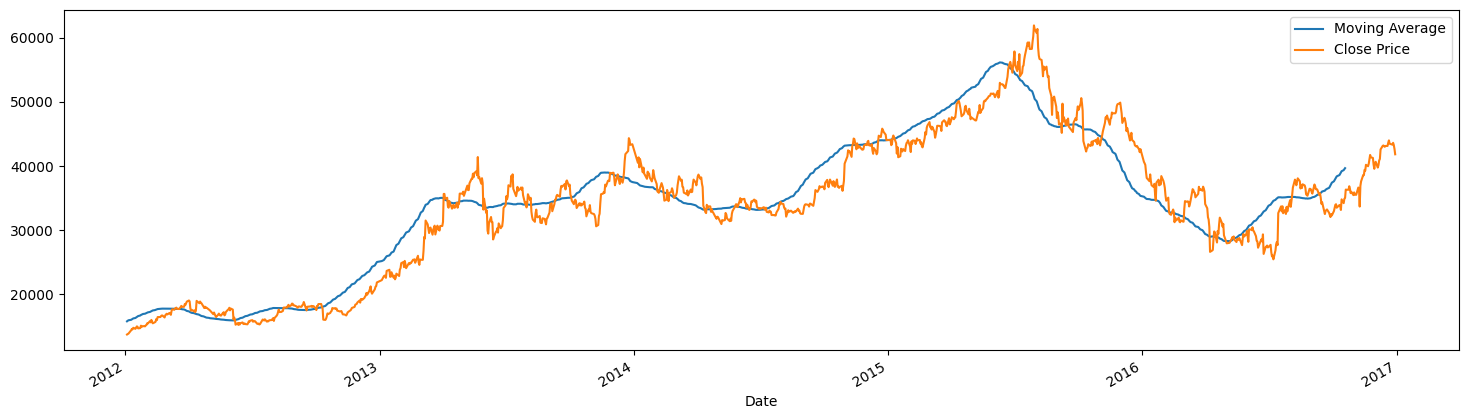

In [14]:
df_train['Moving_Average'] = df_train['Close'].rolling(50).mean()
#plot the moving average
plt.figure(figsize=(18, 5))
df_train['Moving_Average'].plot(label='Moving Average')
df_train['Close'].plot(label='Close Price')
plt.legend()
plt.show()

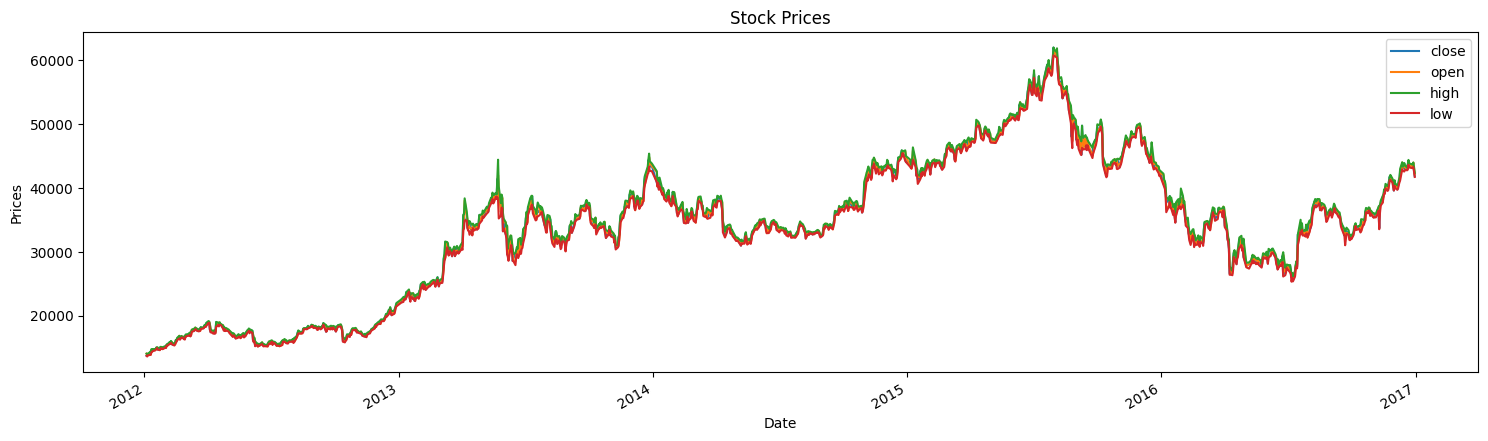

In [15]:
# Multiline plot for Close, Open, High and Low
plt.subplots(figsize=(18,5))
plt.xlabel('Date')
plt.ylabel('Prices')
df_train['Close'].plot(label='close')
df_train['Open'].plot(label='open')
df_train['High'].plot(label='high')
df_train['Low'].plot(label='low')
plt.legend()
plt.title('Stock Prices')
plt.show()

Text(0.5, 1.0, 'Price Return')

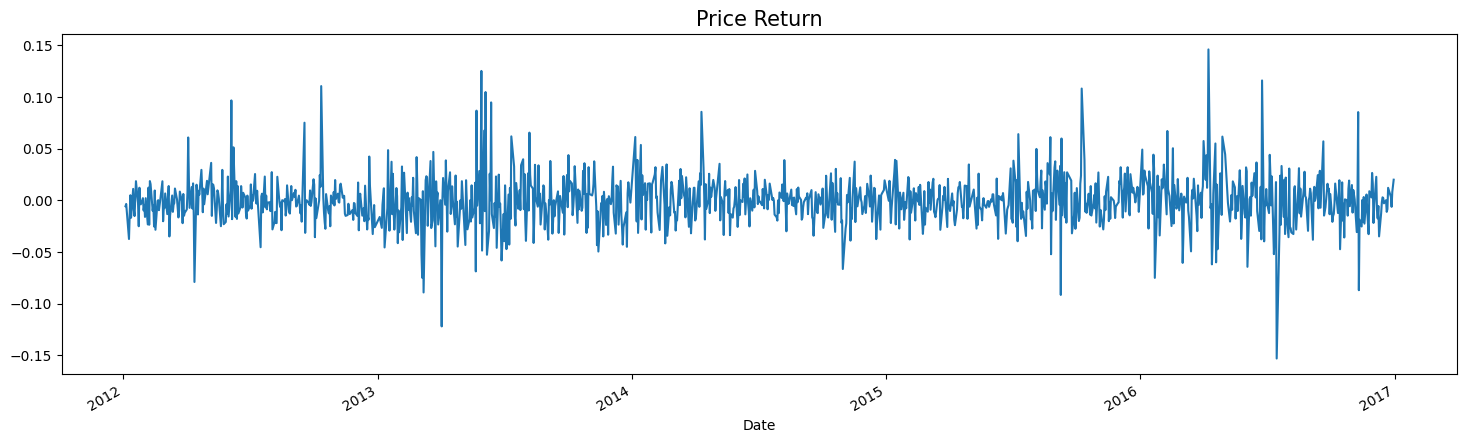

In [16]:
# Price Returen 
df_train['PriceDifference'] = df_train['Close'].shift(-1) - df_train['Close']
df_train['ReturnPrice'] = df_train['PriceDifference'] /df_train['Close']
df_train['ReturnPrice'].plot(figsize=(18,5))
plt.title('Price Return', size = 15)

<Axes: xlabel='Date'>

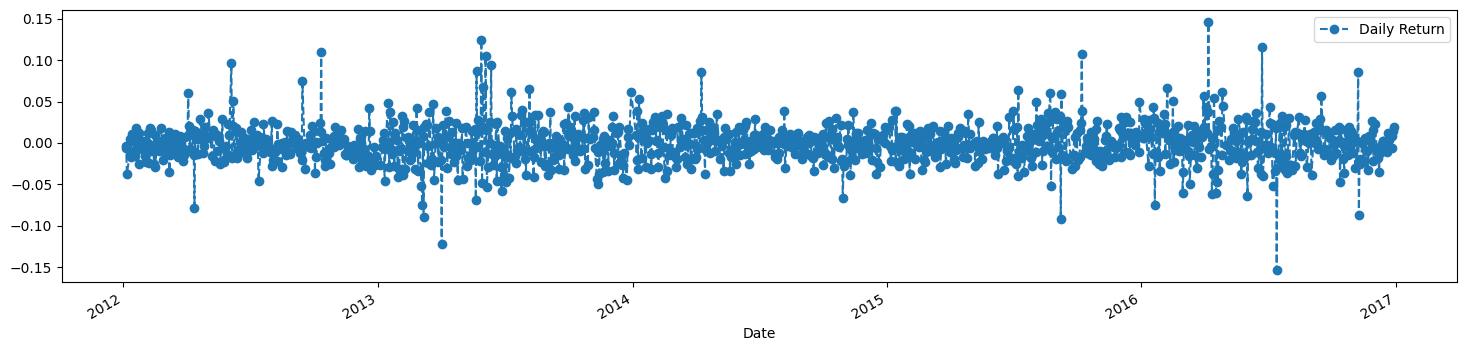

In [17]:
# pct_change is used to find the percent change for each day
df_train['Daily Return'] = df_train['Close'].pct_change()

# Lets plot the daily return percentage
df_train['Daily Return'].plot(figsize=(18,4), legend=True, linestyle='--', marker='o')

<Axes: >

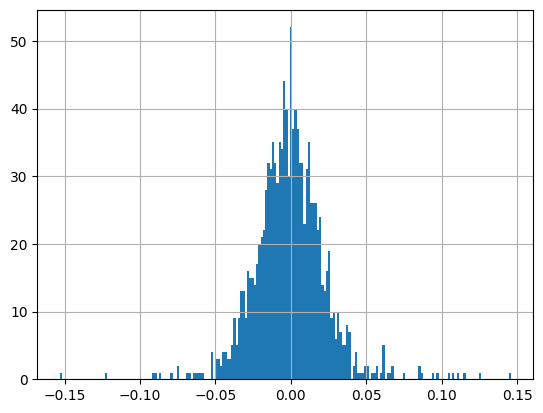

In [18]:
df_train['Daily Return'].hist(bins=200)

<Axes: xlabel='Daily Return', ylabel='Density'>

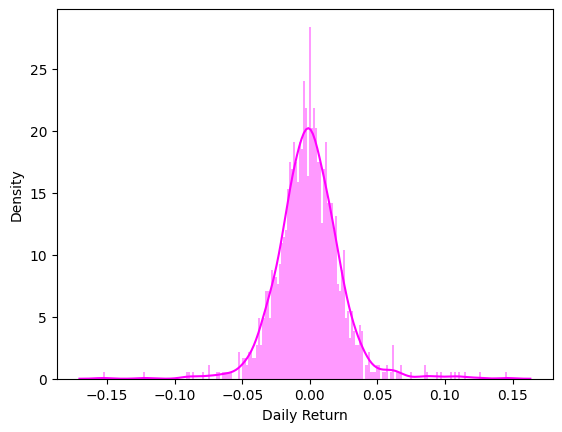

In [19]:
sns.distplot(df_train['Daily Return'].dropna(), bins=200, color='magenta')

##### Different Moving Averages

In [20]:
# Plotting several moving averages
MovingAverage_day = [10,20,100]

for ma in MovingAverage_day:
    column_name = 'MovingAverage for %s days' %(str(ma))
    df_train[column_name] = df_train['Close'].rolling(ma).mean()

<Axes: xlabel='Date'>

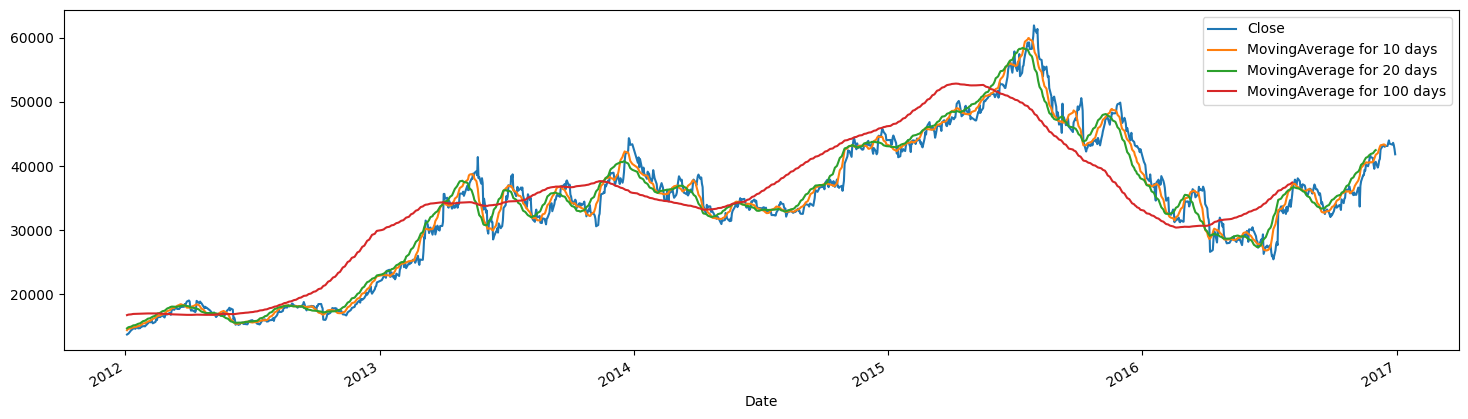

In [21]:
df_train[['Close','MovingAverage for 10 days','MovingAverage for 20 days','MovingAverage for 100 days']].plot(subplots=False,figsize=(18,5))

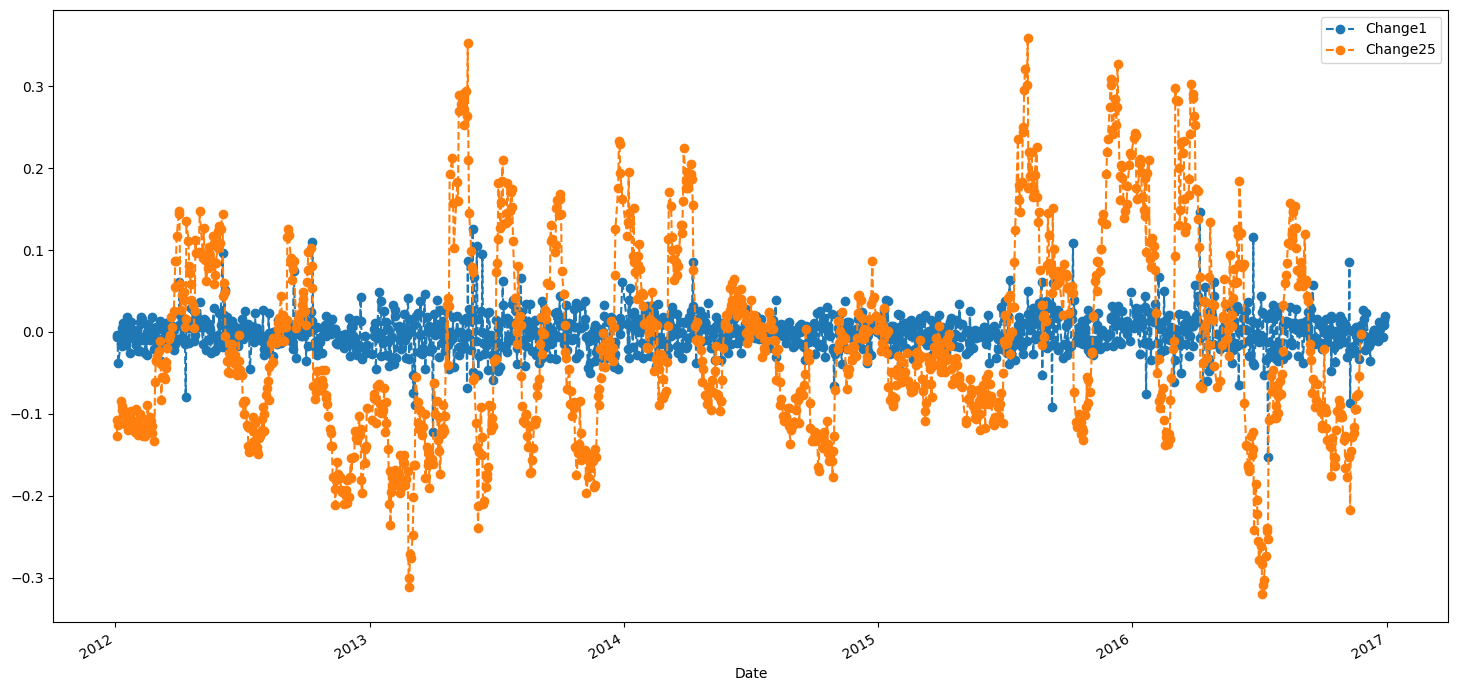

In [22]:
# Rate of Change
MovingAverage_day = [1,5,10,15,20,25]
for MovingAverage in MovingAverage_day:
    column_name = "Change{}".format(str(MovingAverage))
    df_train[column_name] = df_train['Close'].pct_change(MovingAverage)


df_train[['Change1','Change25']].plot(figsize=(18,9),legend=True,linestyle='--',marker='o')
plt.show()

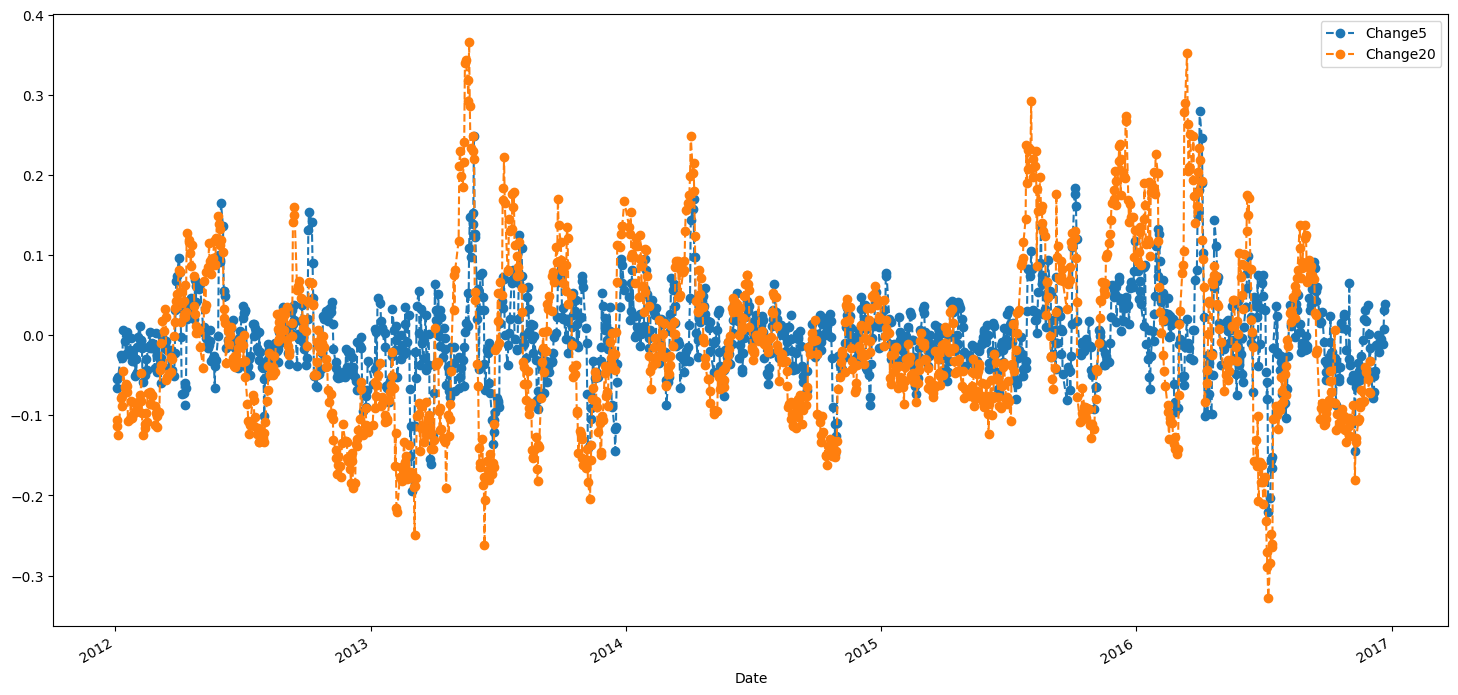

In [24]:
df_train[['Change5','Change20']].plot(figsize=(18,9),legend=True,linestyle='--',marker='o')
plt.show()

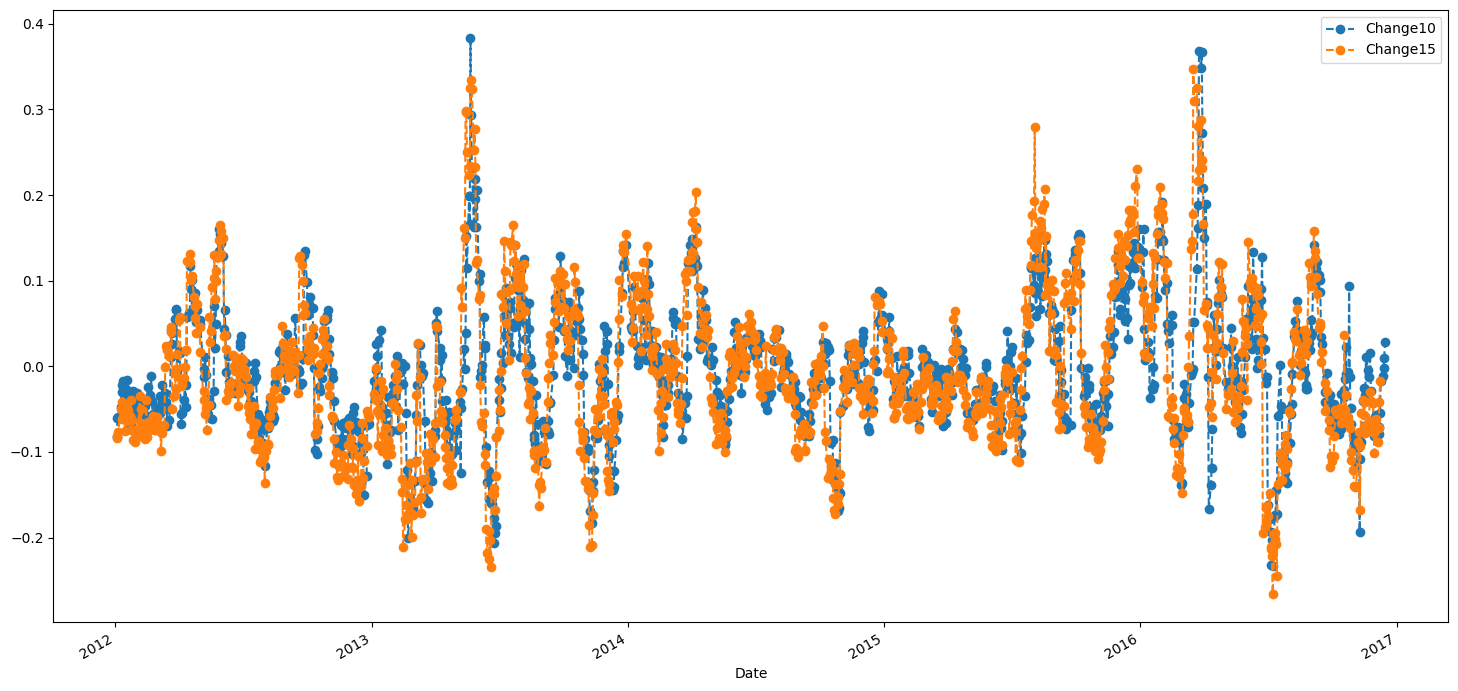

In [25]:
df_train[['Change10','Change15']].plot(figsize=(18,9),legend=True,linestyle='--',marker='o')
plt.show()

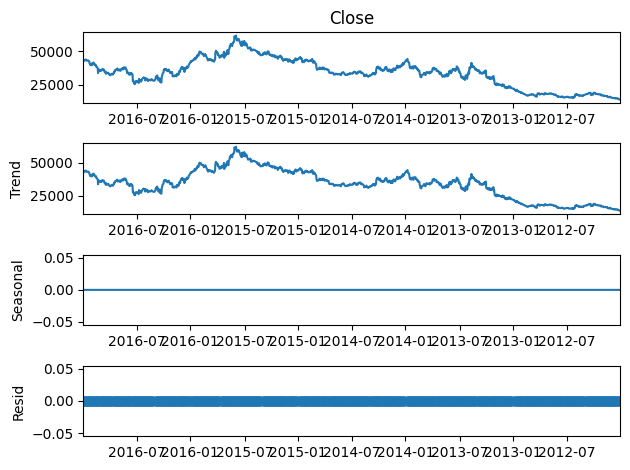

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_train['Close'], model='additive',period = 1)
result.plot()
plt.show()

##### Making data stationary

In [27]:
#  Function to check stationary of data using ADF(Augmented Dickey-Fuller(adfuller))
from statsmodels.tsa.stattools import adfuller
def adfuller_test(Close):
  result=adfuller(Close)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
  for value,label in zip(result,labels):
      print(label+' : '+str(value) )

  if result[1] <= 0.05:
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
  else:
      print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [28]:
adfuller_test(df_train["Close"])

ADF Test Statistic : -0.814059222421211
p-value : 0.8149573536051891
#Lags Used : 2
Number of Observations : 1223
weak evidence against null hypothesis,indicating it is non-stationary 


In [29]:
# Convert the data to stationary form
df_train['Close First Difference'] = df_train["Close"] - df_train["Close"].shift(1)
df_train.dropna(inplace = True)
df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading,Moving_Average,PriceDifference,ReturnPrice,...,MovingAverage for 10 days,MovingAverage for 20 days,MovingAverage for 100 days,Change1,Change5,Change10,Change15,Change20,Change25,Close First Difference
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-04,2016-08-04,35200,35530,34210,35500,1224800,43052588000,35190.6,-960.0,-0.027042,...,37026.0,36628.5,37428.7,-0.031114,-0.067752,-0.044415,0.003675,-0.005602,-0.022846,-1140.0
2016-08-03,2016-08-03,34340,35080,33900,34540,1288600,44487561000,35183.4,-900.0,-0.026057,...,36824.0,36558.5,37355.8,-0.027042,-0.066486,-0.055252,-0.025945,-0.038954,-0.051360,-960.0
2016-08-02,2016-08-02,34330,34580,33610,33640,640000,21847347000,35172.0,1030.0,0.030618,...,36491.0,36423.5,37265.6,-0.026057,-0.102933,-0.090073,-0.055056,-0.074298,-0.075570,-900.0
2016-08-01,2016-08-01,33300,34900,33110,34670,947300,32604467000,35169.4,-1240.0,-0.035766,...,36308.0,36335.0,37179.6,0.030618,-0.084741,-0.050137,-0.052214,-0.048573,-0.059414,1030.0
2016-07-29,2016-07-29,32230,34150,32210,33430,827000,27331777000,35175.0,-520.0,-0.015555,...,35888.0,36184.0,37077.7,-0.035766,-0.087609,-0.111613,-0.095998,-0.082853,-0.099407,-1240.0


In [30]:
adfuller_test(df_train['Close First Difference'].dropna())

ADF Test Statistic : -23.012814101336104
p-value : 0.0
#Lags Used : 1
Number of Observations : 1124
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


##### Checking randomness in data

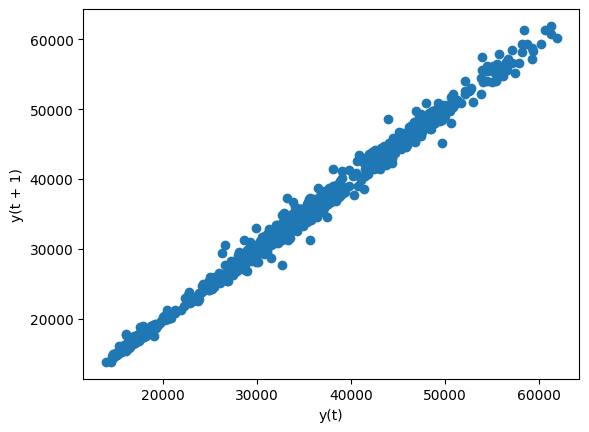

In [31]:
# Lag plot
from pandas.plotting import lag_plot
lag_plot(df_train['Close'])
plt.show() 

###### Previous day data and current day data is linearly related

##### Autocorrelation and partial autocorrelation plot

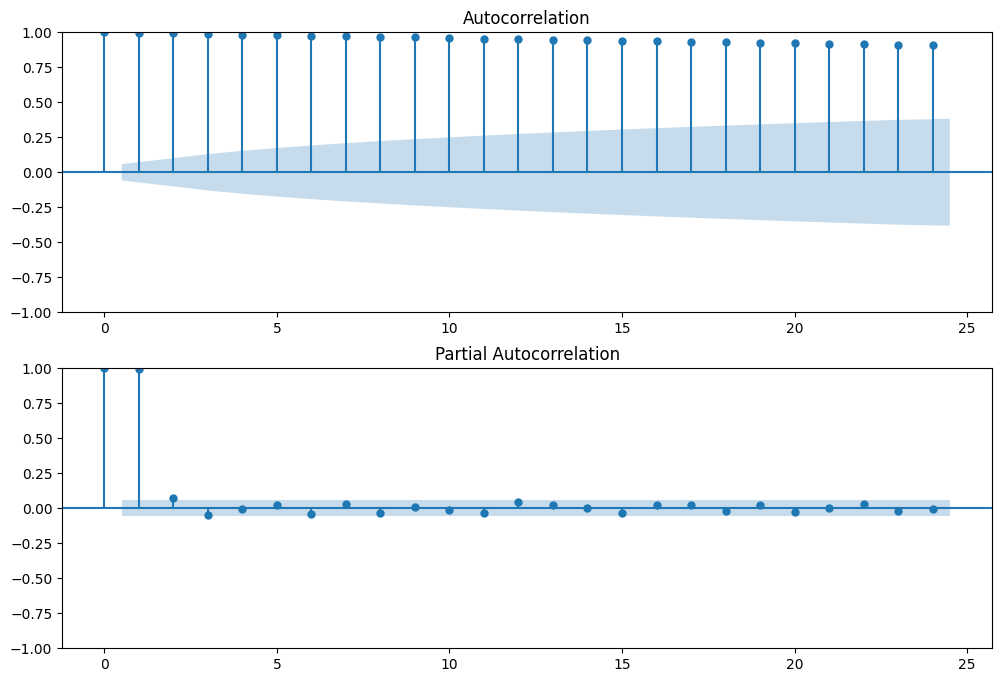

In [32]:
# non stationary original data
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_train['Close'].dropna(),lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_train['Close'].dropna(),lags=24,ax=ax2)




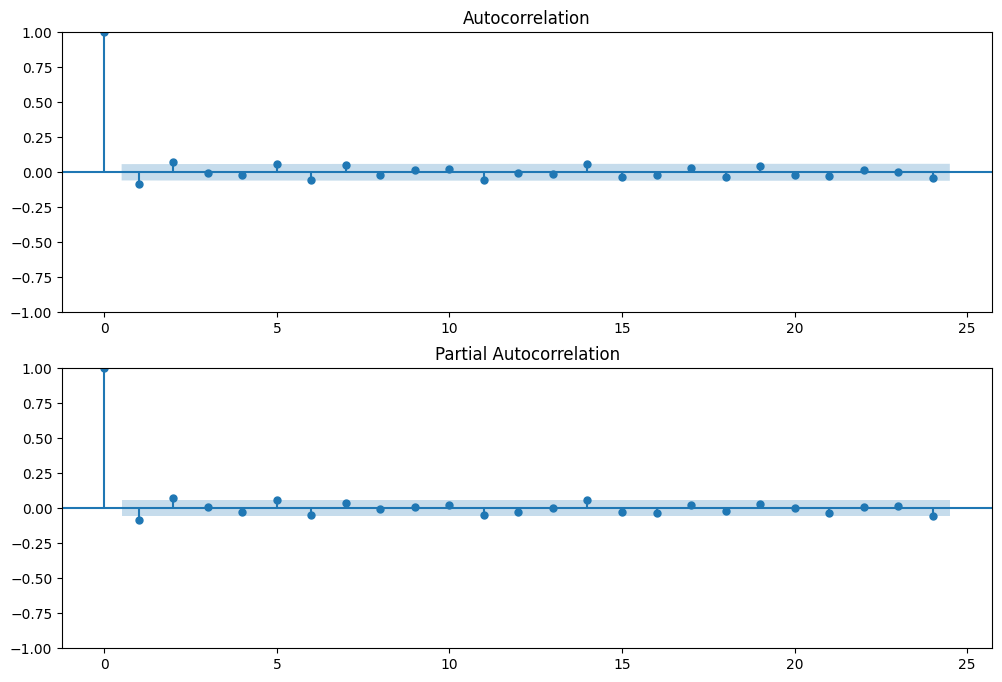

In [33]:
# stationary data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_train['Close First Difference'].dropna(),lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_train['Close First Difference'].dropna(),lags=24,ax=ax2)

#### Prophet model


In [34]:
# Prophet model
from prophet import Prophet



In [35]:
df_1= df_train.copy()
df_1.dropna(inplace=True)

In [36]:
df_final = df_1.Close

In [37]:
df = df_1.Close


In [38]:
df = df.reset_index()

In [39]:
data = df.rename(columns={"Date": "ds", "Close": "y"})

In [ ]:
data.head()

,ds,y
0,2016-08-04,35500
1,2016-08-03,34540
2,2016-08-02,33640
3,2016-08-01,34670
4,2016-07-29,33430


In [40]:
# spliting dataset
train_size = int(len(data) * 0.8)  # Use 80% of the data for training
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]


In [41]:
# fititng model
model = Prophet()
model.fit(train_data)


19:32:39 - cmdstanpy - INFO - Chain [1] start processing
19:32:40 - cmdstanpy - INFO - Chain [1] done processing


##### Forecasting

In [42]:
# Forecasting
future = model.make_future_dataframe(periods=len(test_data), freq='D', include_history=False)
forecast = model.predict(future)


##### Evaluation of model

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_true = test_data['y'].values
y_pred = forecast['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 4197.40
Mean Squared Error (MSE): 23576771.47
Root Mean Squared Error (RMSE): 4855.59


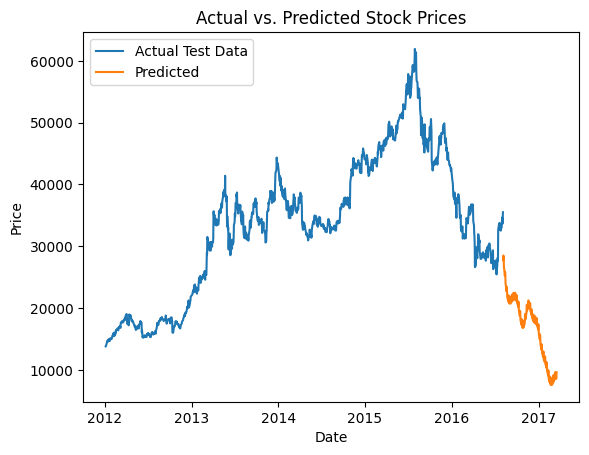

In [44]:
# Plotting the actual values
plt.plot(data['ds'], data['y'], label='Actual Test Data')

# Plotting the predicted values
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.show()


##### Prediction

In [45]:
model = Prophet()
model.fit(data)


19:32:48 - cmdstanpy - INFO - Chain [1] start processing
19:32:50 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
Prediction_test = model.predict(test_data[['ds']])


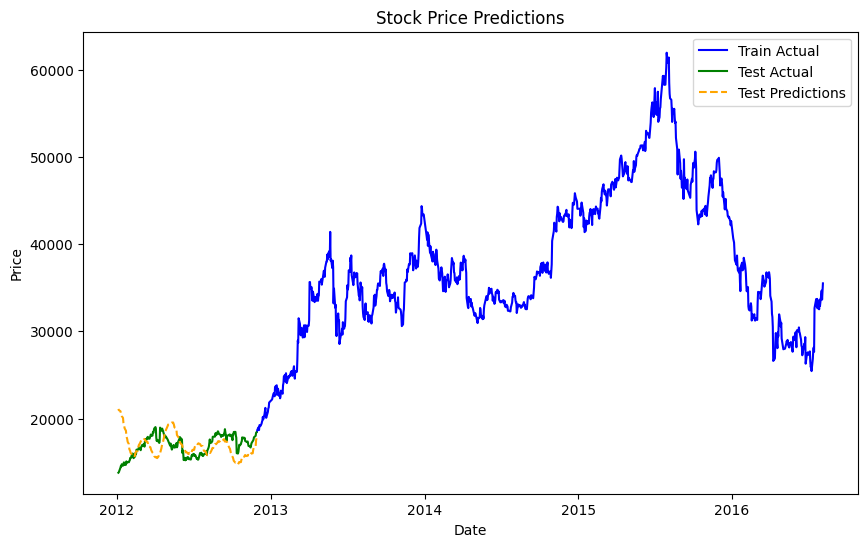

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train Actual', color='blue')
plt.plot(test_data['ds'], test_data['y'], label='Test Actual', color='green')
plt.plot(test_data['ds'], Prediction_test['yhat'], label='Test Predictions', color='orange', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Predictions')
plt.legend()
plt.show()


##### LSTM model

In [48]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [49]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data['y'].values.reshape(-1, 1))

# Create sliding windows
window_size = 60
X_train, y_train = [], []
for i in range(window_size, len(train_data_scaled)):
    X_train.append(train_data_scaled[i-window_size:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [50]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [51]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
27/27 [==============================] - 30s 208ms/step - loss: 0.0425
Epoch 2/10
27/27 [==============================] - 7s 248ms/step - loss: 0.0102
Epoch 3/10
27/27 [==============================] - 6s 220ms/step - loss: 0.0076
Epoch 4/10
27/27 [==============================] - 5s 182ms/step - loss: 0.0076
Epoch 5/10
27/27 [==============================] - 4s 166ms/step - loss: 0.0082
Epoch 6/10
27/27 [==============================] - 5s 180ms/step - loss: 0.0067
Epoch 7/10
27/27 [==============================] - 6s 208ms/step - loss: 0.0061
Epoch 8/10
27/27 [==============================] - 5s 168ms/step - loss: 0.0061
Epoch 9/10
27/27 [==============================] - 4s 151ms/step - loss: 0.0056
Epoch 10/10
27/27 [==============================] - 5s 190ms/step - loss: 0.0056


In [52]:
dataset_total = pd.concat((train_data['y'], test_data['y']), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_data) - window_size:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(window_size, window_size + len(test_data)):
    X_test.append(inputs[i-window_size:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


8/8 [==============================] - 8s 49ms/step


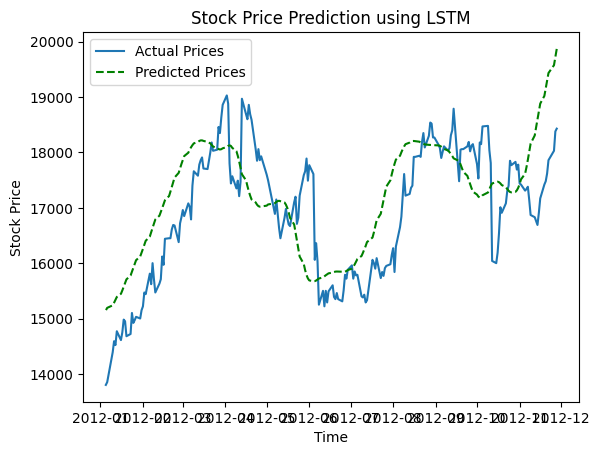

In [53]:
plt.plot(test_data['ds'], test_data['y'], label='Actual Prices')
plt.plot(test_data['ds'], predicted_prices, label='Predicted Prices', linestyle='--', color='green')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


##### Auto regression model

In [54]:
# Import Libraries
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import lightgbm as lgb
import warnings                                
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta 
from scipy.optimize import minimize              
import statsmodels.formula.api as smf          
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [55]:
# Fit training data on Auto regressor model
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(df_1.Close,lags=5)
res = model.fit()
print(res.summary())
print("μ={} ,ϕ={}".format(res.params[0],res.params[1]))

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1126
Model:                     AutoReg(5)   Log Likelihood               -9129.248
Method:               Conditional MLE   S.D. of innovations            832.893
Date:                Mon, 17 Apr 2023   AIC                          18272.497
Time:                        19:34:53   BIC                          18307.651
Sample:                             5   HQIC                         18285.784
                                 1126                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8674     79.095      0.314      0.753    -130.156     179.891
Close.L1       0.9226      0.030     30.926      0.000       0.864       0.981
Close.L2       0.1488      0.041      3.671      0.0

In [56]:
# Fit training data with covariance type HC0
res = model.fit(cov_type="HC0")
print(res.summary())
print("μ={} ,ϕ={}".format(res.params[0],res.params[1]))

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1126
Model:                     AutoReg(5)   Log Likelihood               -9129.248
Method:               Conditional MLE   S.D. of innovations            832.893
Date:                Mon, 17 Apr 2023   AIC                          18272.497
Time:                        19:34:53   BIC                          18307.651
Sample:                             5   HQIC                         18285.784
                                 1126                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8674     62.346      0.399      0.690     -97.328     147.063
Close.L1       0.9226      0.040     22.867      0.000       0.844       1.002
Close.L2       0.1488      0.054      2.745      0.0

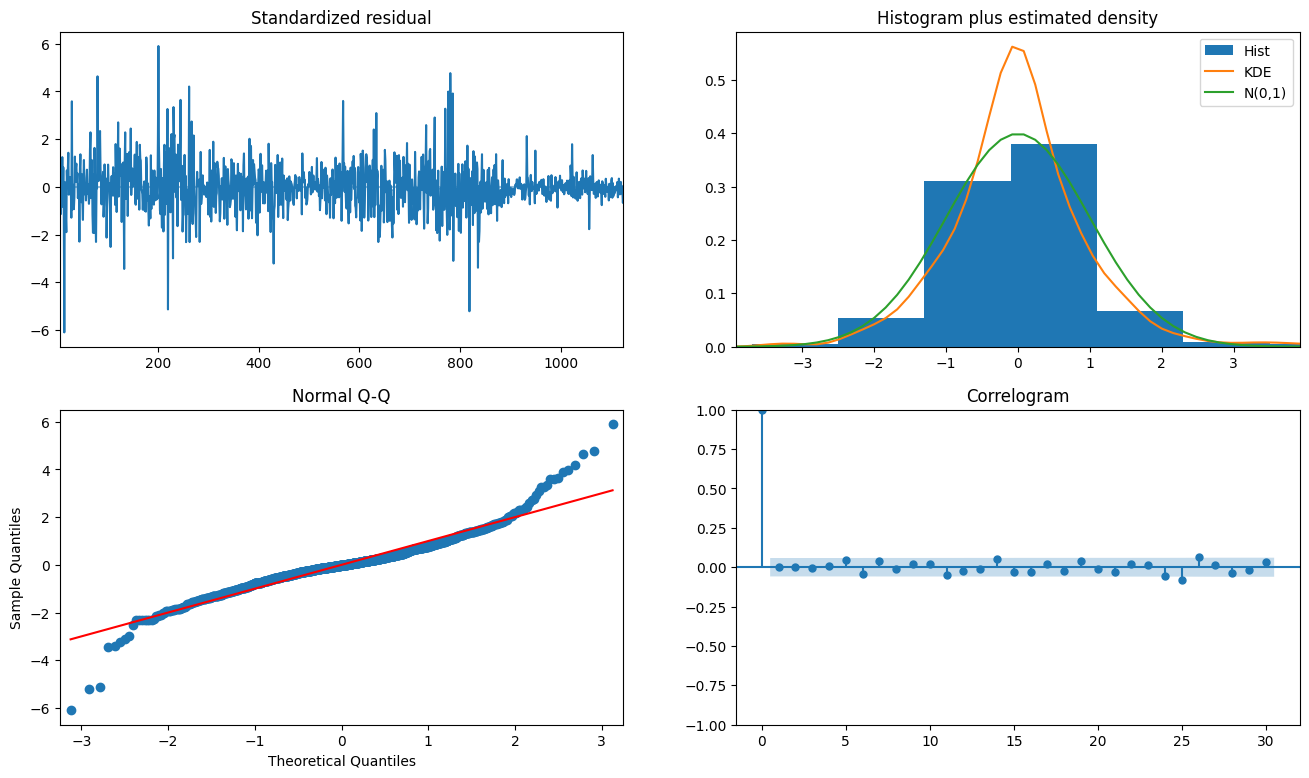

In [57]:
# Plot diagnostics of auto-regressor model
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

##### SARIMA model

In [58]:
from pmdarima.arima import auto_arima

best_sarima_model = auto_arima(train_data['y'], seasonal=True, m=12, trace=True, suppress_warnings=True)
print(best_sarima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=14827.048, Time=5.34 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=14834.069, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=14830.632, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=14831.205, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=14832.446, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=14827.702, Time=3.63 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=14827.891, Time=4.12 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=14825.787, Time=12.59 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=14824.732, Time=9.62 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=14832.341, Time=3.69 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=14832.573, Time=3.82 sec
 ARIMA(3,1,2)(2,0,0)[12] intercept   : AIC=14835.101, Time=5.63 sec
 ARIMA(2,1,3)(2,0,0)[12] intercept   : AIC=14825.639, Time=15.27 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=14831.635, Time=3.10 sec
 AR

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(train_data['y'], order=best_sarima_model.order, seasonal_order=best_sarima_model.seasonal_order)
model_sarima_fit = model_sarima.fit()


In [60]:
forecast_sarima = model_sarima_fit.forecast(steps=len(test_data))


In [61]:
residuals = test_data['y'] - forecast_sarima
train_residuals = train_data['y'] - model_sarima_fit.fittedvalues


In [62]:
# Scale the data
scaler_residuals = MinMaxScaler(feature_range=(0, 1))
train_residuals_scaled = scaler_residuals.fit_transform(train_residuals.values.reshape(-1, 1))

# Create sliding windows
window_size = 60
X_train, y_train = [], []
for i in range(window_size, len(train_residuals_scaled)):
    X_train.append(train_residuals_scaled[i-window_size:i, 0])
    y_train.append(train_residuals_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [63]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')


In [64]:
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
27/27 [==============================] - 40s 172ms/step - loss: 0.0021
Epoch 2/5
27/27 [==============================] - 5s 185ms/step - loss: 6.6373e-04
Epoch 3/5
27/27 [==============================] - 5s 194ms/step - loss: 5.8904e-04
Epoch 4/5
27/27 [==============================] - 5s 172ms/step - loss: 6.1521e-04
Epoch 5/5
27/27 [==============================] - 6s 209ms/step - loss: 6.1701e-04


In [65]:
# Add the last window_size residuals from the train data to the beginning of the test residuals
residuals_total = np.concatenate((train_residuals[-window_size:].values, residuals.values))

# Scale the residuals
inputs = scaler_residuals.transform(residuals_total.reshape(-1, 1))

X_test = []
for i in range(window_size, window_size + len(test_data)):
    X_test.append(inputs[i-window_size:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_residuals = model_lstm.predict(X_test)
predicted_residuals = scaler_residuals.inverse_transform(predicted_residuals)


8/8 [==============================] - 12s 72ms/step


In [66]:
final_predictions = forecast_sarima + predicted_residuals.flatten()


RMSE:  2014.8093810669257


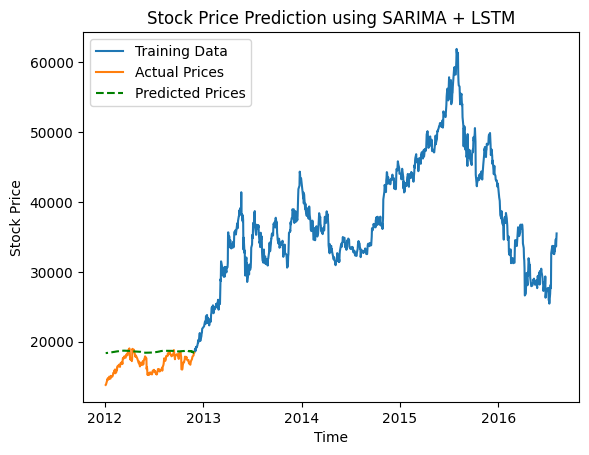

In [67]:
rmse = np.sqrt(mean_squared_error(test_data['y'], final_predictions))
print("RMSE: ", rmse)

plt.plot(train_data['ds'], train_data['y'], label='Training Data')
plt.plot(test_data['ds'], test_data['y'], label='Actual Prices')
plt.plot(test_data['ds'], final_predictions, label='Predicted Prices', linestyle='--', color='green')
plt.title('Stock Price Prediction using SARIMA + LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


##### Arima Model

In [68]:
# split the data into train and test
from sklearn.model_selection import train_test_split
df1_train, df1_test = train_test_split(df_final, test_size=0.2, shuffle=False)

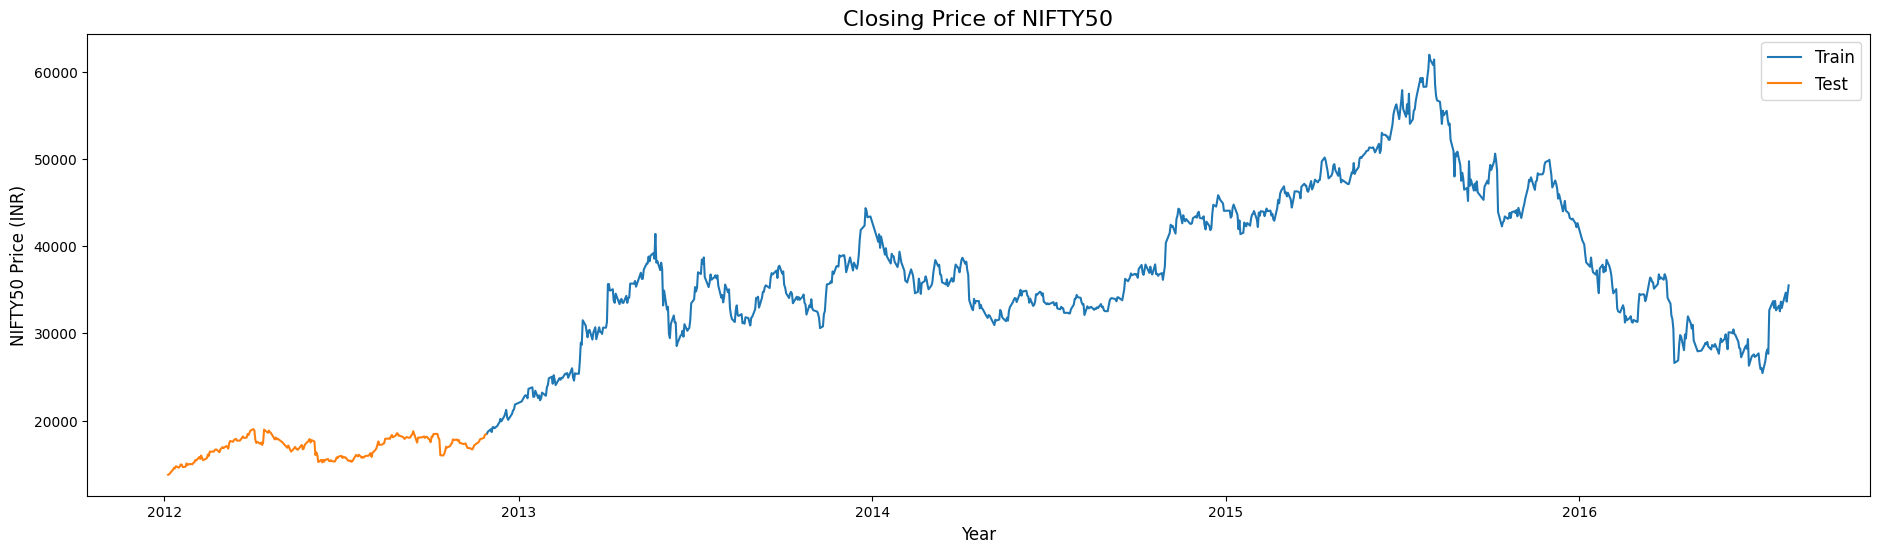

In [69]:
# plot the close variable to check the final feature 
fig, ax = plt.subplots(figsize=(23, 6))
ax.plot(df1_train, label='Train')
ax.plot(df1_test, label='Test')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('NIFTY50 Price (INR)', fontsize=12)
ax.set_title('Closing Price of NIFTY50', fontsize=16)
ax.legend(fontsize=12)

In [70]:
# Fit data on Auto-Arima
model = auto_arima(df1_train, trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df1_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14827.050, Time=3.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14834.069, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14828.635, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14829.211, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14832.446, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14830.543, Time=2.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14830.747, Time=1.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14827.746, Time=4.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14827.851, Time=4.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14829.708, Time=0.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14830.989, Time=2.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14830.317, Time=2.99 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14830.790, Time=4.12 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=14825.230, Time=1.74 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [71]:
forecast = model.predict(n_periods=len(df1_test))

In [72]:
forecast.head() 

900    18473.360351
901    18467.876915
902    18491.181855
903    18458.560999
904    18490.597342
dtype: float64

In [73]:
print(df1_test.index)  

DatetimeIndex(['2012-11-28', '2012-11-27', '2012-11-26', '2012-11-22',
               '2012-11-21', '2012-11-20', '2012-11-19', '2012-11-16',
               '2012-11-15', '2012-11-14',
               ...
               '2012-01-19', '2012-01-18', '2012-01-17', '2012-01-16',
               '2012-01-13', '2012-01-12', '2012-01-11', '2012-01-10',
               '2012-01-06', '2012-01-05'],
              dtype='datetime64[ns]', name='Date', length=226, freq=None)


In [74]:
index_values =['2012-11-28', '2012-11-27', '2012-11-26', '2012-11-22',
               '2012-11-21', '2012-11-20', '2012-11-19', '2012-11-16',
               '2012-11-15', '2012-11-14', '2012-11-13', '2012-11-12', 
               '2012-11-09', '2012-11-08', '2012-11-07', '2012-11-06',
               '2012-11-05', '2012-11-02', '2012-11-01', '2012-10-31',
               '2012-10-30', '2012-10-29', '2012-10-26', '2012-10-25',
               '2012-10-24', '2012-10-23', '2012-10-22', '2012-10-19',
               '2012-10-18', '2012-10-17', '2012-10-16', '2012-10-15',
               '2012-10-12', '2012-10-11', '2012-10-10', '2012-10-09',
               '2012-10-08', '2012-10-05', '2012-10-04', '2012-10-03']
forecast1 = forecast.tolist()
Actual = df1_test.tolist()

In [75]:
frame = [index_values, Actual, forecast]
result = pd.DataFrame(frame)
result = result.transpose() #To Transpose and make each rows as columns
result.columns=['Date','Actual','Predicted'] #Rename the columns
result.head()

,Date,Actual,Predicted
0,2012-11-28,18430,18473.360351
1,2012-11-27,18380,18467.876915
2,2012-11-26,18030,18491.181855
3,2012-11-22,17860,18458.560999
4,2012-11-21,17620,18490.597342


In [76]:
result["Date"] = pd.to_datetime(result["Date"])
result.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

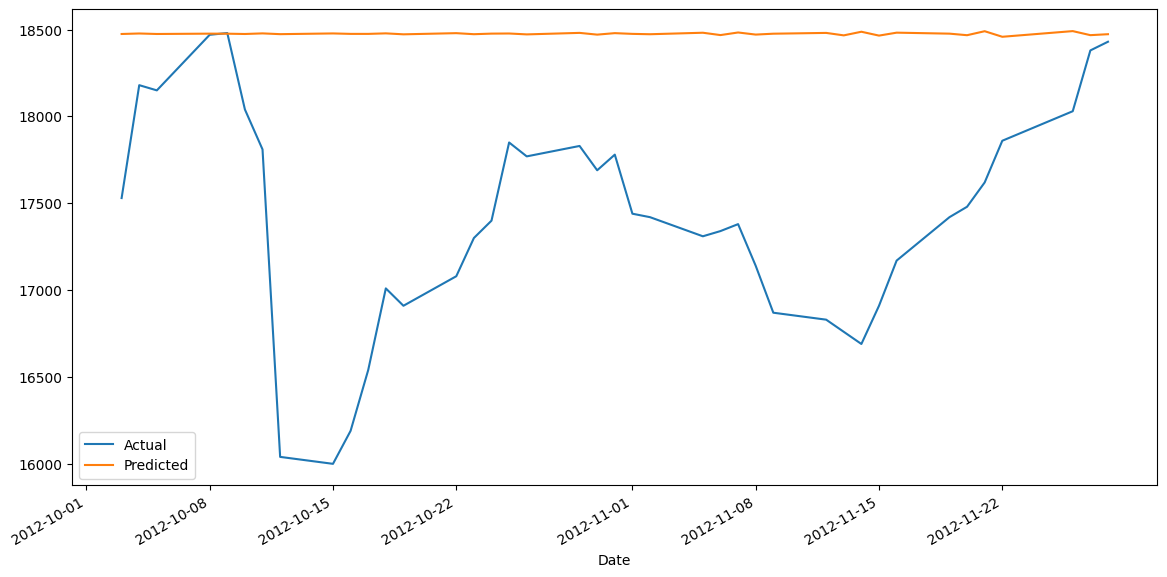

In [77]:
result[["Actual", "Predicted"]].plot(figsize=(14, 7))

In [78]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

# Function to get MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

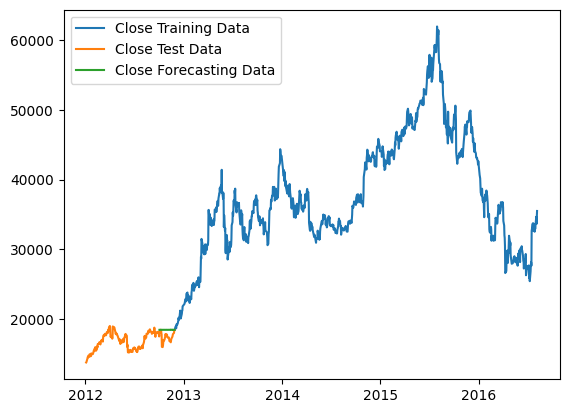

In [79]:
# Plot forcasting Close price
plt.plot(df1_train,label='Close Training Data')
plt.plot(df1_test,label='Close Test Data')
plt.plot(result['Predicted'],label='Close Forecasting Data')
plt.legend()

In [80]:
# Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("RMSE of ARIMA:", np.sqrt(mean_squared_error(result.Actual,result.Predicted)))
print("\nMAE of ARIMA:", mean_absolute_error(result.Actual,result.Predicted))

RMSE of ARIMA: 1961.5534764568515

MAE of ARIMA: 1596.8699026916381


In [81]:
# Calculating error for Auto-Arima without exgenous features
print("mean absoulte percentage error:", round(mean_absolute_percentage_error(result.Actual,result.Predicted),2),"%")

mean absoulte percentage error: 9.98 %
